# Example Analysis

## Import libraries 

In [1]:
from discordance import io
from discordance import epochtypes

import json
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from discordance.io.symphonyreader import SymphonyReader
from discordance.io.filemap import FileMap
from discordance.funks.psth import calculate_psth
from discordance.funks.spike_detection import detect_spikes
from discordance.io.discordancereader import DiscordanceReader
from discordance.funks import charting

## Set up file information

In [2]:
path = "tests/data/2020-07-21A.h5"
outpath = "tests/output/2020-07-21A.json"

filemap = FileMap(path, outpath)

## Convert symphony to json

In [ ]:
sr = SymphonyReader(path)
sr.to_json(outpath)
del sr

## Read json into discordance

In [12]:
# TODO how to get corresponding h5 file for each json file?
dr = DiscordanceReader(filemap)
df = dr.to_epochs()
df.head()

,Name,Epoch
0,/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd6...,<discordance.epochtypes.spiketrace.SpikeTrace ...
1,/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd6...,<discordance.epochtypes.spiketrace.SpikeTrace ...
2,/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd6...,<discordance.epochtypes.spiketrace.SpikeTrace ...
3,/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd6...,<discordance.epochtypes.spiketrace.SpikeTrace ...
4,/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd6...,<discordance.epochtypes.spiketrace.SpikeTrace ...


In [16]:
print(df.iloc[0].Name)
print(df.iloc[0].Epoch)

/experiment-b4de61ea-4027-46ba-bdd3-cc44f85bd683/epochGroups/epochGroup-00aefebb-b806-4e58-8573-a50519ca4783/epochBlocks/edu.wisc.sinhalab.protocols.LedPulse-4923f1e0-ef64-4392-b94d-23fe0ee28f35/epochs/epoch-3ee68f58-c505-429e-938e-4c7286b2e346


## Analyze random epoch

In [17]:
epoch = df.Epoch.iloc[50]
spike_info = detect_spikes(epoch.values)
print(spike_info)

TraceSpikeResult(sp=array([1557, 1585, 1609, 2243, 2296, 2372, 2446, 2778, 2820, 2897, 2942,
       3032, 3102, 7354]), spike_amps=array([68.67746897, 57.95091752, 43.82111773, 63.44689407, 59.20670902,
       50.68871362, 53.24636633, 49.26576538, 49.12432464, 46.2042831 ,
       39.49627145, 48.65262449, 48.73145126, 58.92120142]), min_spike_peak_idx=array([10]), max_noise_peak_time=array([3110]), violation_idx=array([3110]))


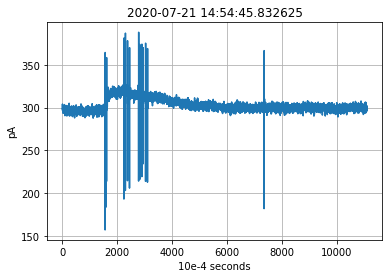

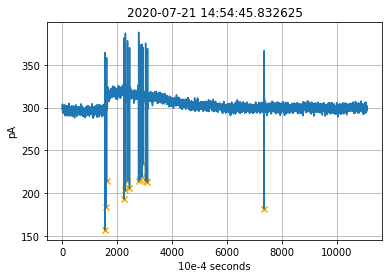

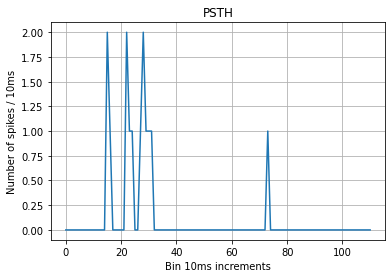

In [18]:
charting.plt_trace(epoch)
charting.plt_spikes(epoch, spike_info)
psth = calculate_psth(epoch.values, spike_info, plot=True)